In [1]:
import torch
from repop import dataset,params2theta,theta2params
from matplotlib import pyplot as plt
import pandas as pd

import numpy as np
np.random.seed(42)

In [2]:
threshold = 300
df = pd.read_csv('real_data/OD_exp.csv',header=None, names=['OD_dil','20','200','2000'])
df['OD_dil'] = df['OD_dil'].fillna(method='ffill')
OD_label = [    float(i.split('"')[1])  for i in df['OD_dil'] ]

df.iloc[:,1] = pd.to_numeric(df.iloc[:,1], errors='coerce').fillna(np.inf)
df.iloc[:,2] = pd.to_numeric(df.iloc[:,2], errors='coerce').fillna(np.inf)
df.iloc[:,3] = pd.to_numeric(df.iloc[:,3], errors='coerce').fillna(0)

ks = df.to_numpy()[:,1:4]
dil_schedule = np.array((20,200,2000))#/.9



/tmp/ipykernel_17028/2473010097.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1] = pd.to_numeric(df.iloc[:,1], errors='coerce').fillna(np.inf)
/tmp/ipykernel_17028/2473010097.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,2] = pd.to_numeric(df.iloc[:,2], errors='coerce').fillna(np.inf)
/tmp/ipykernel_17028/2473010097.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df

In [3]:
cts,dils =[],[]
for k_line in ks:
    index = np.argmax(k_line <= threshold) if np.any(ks <= threshold) else len(ks) - 1
    cts.append( k_line[index] )
    dils.append( dil_schedule[index] )
    #print('Day ')

cts,dils = np.array(cts).astype(int),np.array(dils).astype(float)

In [4]:
od = np.array([float(d.split('"')[1]) for d in df['OD_dil']])

In [5]:
data =  dataset(cts[od!=1],dils[od!=1],threshold)

In [6]:
data.evaluate(components=int(np.sqrt(data.counts.numel())))

10.1210205789139 -619.5353405593786 -360.8269747492793
9.34435492308505 -617.7930665979106 -287.93267211684156
8.75511927709365 -618.0296221702083 -230.53768852387714
8.317278024362873 -617.7164694260105 -188.01126227848283
7.965844864421034 -618.0806316144798 -154.2940264679694
7.743709188595057 -618.7452998909448 -132.21368837846057
7.558330012612319 -618.5617444383076 -114.42838415735976
7.411255630828838 -618.5778621636689 -100.17803539020532
7.306154852649273 -619.0128155617524 -89.58772990225809
7.211647203360414 -618.7341376389084 -80.71206842336655
7.137293664732282 -618.3315249023948 -73.92663855185936
7.089321427873962 -618.3682170346812 -69.26089809585334
7.059897843247261 -618.5831355372452 -66.20394866091603
7.040174814674105 -618.7223258496965 -64.15889138811097
7.02651113707746 -618.7812359113022 -62.77929563476689
7.016805048671405 -618.783885924254 -61.838239815764844
7.009713637965766 -618.7483463903009 -61.18797183097879
7.00440003756657 -618.6939598356428 -60.728374

(tensor([5.7295e+03, 2.9928e+04, 2.5169e+03, 4.3175e+03, 9.9777e+03, 1.3742e+03,
         9.3894e+02, 1.9106e+02, 1.2037e+00], device='cuda:0',
        dtype=torch.float64),
 tensor([9.6912e+02, 4.6456e+03, 4.8185e+02, 1.3899e+03, 3.9454e+03, 3.4823e+02,
         3.3832e+02, 5.4552e+01, 5.7929e-01], device='cuda:0',
        dtype=torch.float64),
 tensor([0.2388, 0.2074, 0.1502, 0.1328, 0.1111, 0.0795, 0.0516, 0.0193, 0.0093],
        device='cuda:0', dtype=torch.float64))

/home/pessoa/Codes/CElegans-Plate/repop.py:322: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels((ax.get_xticks() * bins[-1]).astype(int))


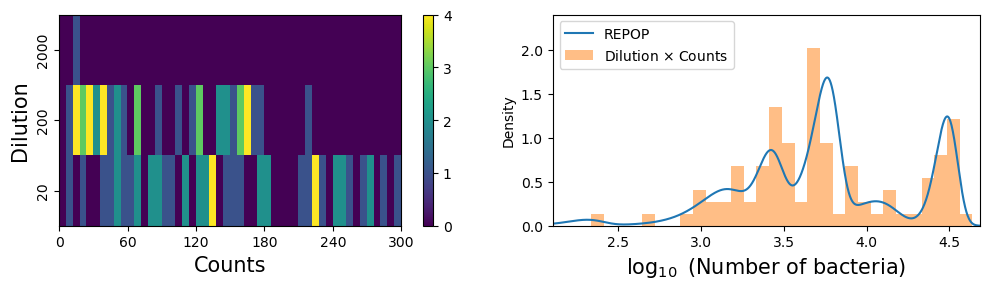

In [7]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
data.dil_imshow(ax[0],fig)
data.log_plots(ax[1])
plt.tight_layout()
ax[1].legend()
xlim = ax[1].get_xlim()
ax[1].set_ylim(0,2.4)

plt.savefig('graphs/3dils.png',dpi=500)

In [8]:
del data.lpkdil_n
#del data

In [9]:
from synth_data import cases

#make a case with the 3 higher probability peaks
m,s,r = [d[:4].cpu() for d in data.ev]
r=r/r.sum()
cs = cases.case(m.numpy(),s.numpy(),r.numpy(),'Case redone')

In [10]:
cts,dils = cs.sample_data(size=500)

In [11]:
data_synth =  dataset(cts,dils,threshold=300)
data_synth.evaluate()

6.256331801481054 -2899.7329572320505 -227.40364417937047
6.1663002871382275 -2898.4383581468946 -184.46483373529924
6.13178740839099 -2899.6942167040324 -166.08167628855057
6.121865315311483 -2901.1633036777835 -159.75515728027526


(tensor([ 5849.9524,  5699.0058,  5215.5144,  2643.8741,  2626.6679,  3683.3260,
          4836.4845,  2200.6287, 30270.3306, 30524.0574, 30255.2848,  4441.6318,
         30476.0787, 29918.8114, 30189.8857, 30324.1284, 28833.3431, 29330.8910,
         29312.4925, 28335.9516, 26172.6783, 14480.0451], device='cuda:0',
        dtype=torch.float64),
 tensor([ 909.0991,  996.9881, 1155.5254,  474.2132,  477.8238,  843.8837,
         1189.4591,  362.8101, 3061.9921, 3476.2332, 3229.9981, 1241.3728,
         3637.7977, 3200.3552, 3743.6419, 4440.4671, 2518.2060, 3298.0801,
         3685.2782, 5666.3318, 6310.4567, 2779.4047], device='cuda:0',
        dtype=torch.float64),
 tensor([0.1304, 0.1159, 0.1022, 0.0878, 0.0783, 0.0701, 0.0640, 0.0544, 0.0449,
         0.0387, 0.0348, 0.0303, 0.0299, 0.0237, 0.0200, 0.0165, 0.0159, 0.0131,
         0.0109, 0.0079, 0.0062, 0.0041], device='cuda:0', dtype=torch.float64))

/home/pessoa/Codes/CElegans-Plate/repop.py:322: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels((ax.get_xticks() * bins[-1]).astype(int))


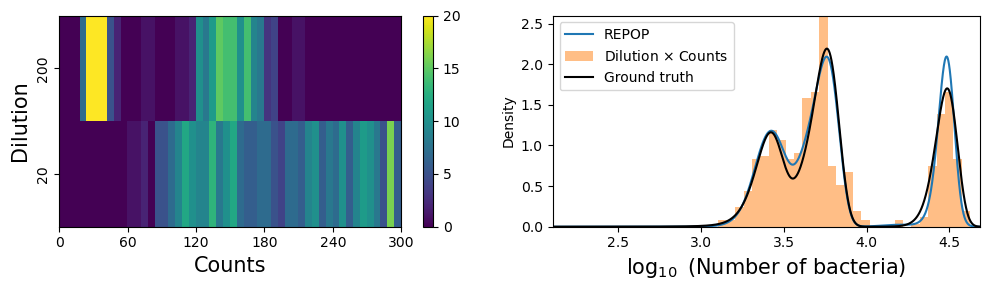

In [12]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
data_synth.dil_imshow(ax[0],fig)
data_synth.log_plots(ax[1],params2theta(m,s,r))

ax[1].set_xlim(xlim)
plt.tight_layout()
ax[1].legend()
ax[1].set_ylim(0,2.6)

plt.savefig('graphs/3dils_synth.png',dpi=500)